# Regresión Lineal Multivariada
- Alumno: Renzo Alessandro Sucari Velásquez
- Dataset: House Sales in King County, USA 
  - Link: https://www.kaggle.com/harlfoxem/housesalesprediction
  - Descripción: Este conjunto de datos contiene precios de venta de viviendas del condado de King y Seattle USA. Incluyendo viviendas ya vendidas entre mayo del 2014 y mayo del 2015.
  - 19 caracteristicas de las casas + precio + ID
  - 21613 instancias
- Valor a predecir (y): Precio
- Valores de x tomadas: metros cuadrado, número de dormitorios y número de pisos.



## 1. Importamos las librerias

In [184]:
import numpy as np              # Manipulacion de estuctura
import pandas as pd             # Manipulacion de CSV
import matplotlib.pyplot as plt # Graficos

## 2. Cargamos la dataset

In [185]:
# leemos los datos de un conjunto de datos
precio_casas = pd.read_csv('sample_data/kc_house_data.csv')
# Imprimimos las 5 filas iniciales en los datos
precio_casas.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 2.1. Seleccionamos las columnas de Características
- Solo seleccionamos las columnas que trabajaremos como valores de $x_i$.
  - Precio, número de dormitorios, metros cuadrados y número de pisos 

In [186]:
get_columnas = [ "price", "bedrooms", "sqft_lot", "floors" ]
precio_casas = precio_casas[get_columnas]
precio_casas.columns = ["precio", "dormitorios", "tamaño", "pisos"]
precio_casas.head()

,precio,dormitorios,tamaño,pisos
0,221900.0,3,5650,1.0
1,538000.0,3,7242,2.0
2,180000.0,2,10000,1.0
3,604000.0,4,5000,1.0
4,510000.0,3,8080,1.0


### 2.2. Graficamos la dataset

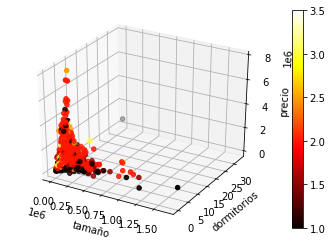

In [187]:
#Graficamos la dataset con 4D - mapa de calor
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = precio_casas["tamaño"]
y = precio_casas["dormitorios"]
z = precio_casas["precio"]
c = precio_casas["pisos"]
img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('tamaño')
ax.set_ylabel('dormitorios')
ax.set_zlabel('precio')

plt.savefig('Dataset.png')
plt.show()

## 3. Normalización de los datos
- Necesitamos normalizar los datos usando la media y la desviación estandar.
- En Python, la normalizacion de los datos es muy fácil de hacer (.mean y .std).
- Luego de ello podremos ver, las variables (columnas) ahora tienen escalas diferentes pero comparables, eso quiere decir que se encuentran en un rango compatible.

Función Matematica:

  $X_{i} = \frac{X_i - \mu_i}{S_i}$


 donde:

  - $\mu_i$ : media
  - $S_i$ : desviación estándar

In [188]:
casas_media = precio_casas.mean()
casas_desviacion_estandar = precio_casas.std()
#print("Media: \n", casas_media, "\n Desviacion std: \n", casas_desviacion_estandar)

normalizacion_casas = precio_casas - casas_media
normalizacion_casas = precio_casas / casas_desviacion_estandar

y = normalizacion_casas["precio"]
normalizacion_casas = normalizacion_casas.drop(labels=["precio"], axis=1)

normalizacion_casas.head()

,dormitorios,tamaño,pisos
0,3.225592,0.136406,1.85189
1,3.225592,0.174841,3.70378
2,2.150395,0.241426,1.85189
3,4.300789,0.120713,1.85189
4,3.225592,0.195072,1.85189


In [190]:
# numero_ datos = m: es el número de ejemplos de entrenamiento
num_datos = len(normalizacion_casas)
theta = pd.DataFrame(columns=["theta"])

# Damos forma a la estructura de theta segun el número de características o variables X_i
# Esto es necesario xq necesitaremos mantener esa estructura para realizar la Hipotesis
for index, value in enumerate(normalizacion_casas.columns.values):
  theta.loc[index] = 0

normalizacion_casas = normalizacion_casas.astype(np.float64)

print("Forma de theta: ", theta.shape)
print("Forma de X_i  : ", normalizacion_casas.shape)

normalizacion_casas.head()
#theta.head()

Forma de theta:  (3, 1)
Forma de X_i  :  (21613, 3)


,dormitorios,tamaño,pisos
0,3.225592,0.136406,1.85189
1,3.225592,0.174841,3.70378
2,2.150395,0.241426,1.85189
3,4.300789,0.120713,1.85189
4,3.225592,0.195072,1.85189


## 4. Función Predicción o Hipótesis(h)
- La funcion_h esta formada por la sumatoria de los $\theta_i$ y los números de variables $x_i$

Función Matematica:

  $h_{\theta}(x) = \theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{n}x_{n}$

 donde:

  - $\theta_{i}$ : segun parametros
  - $x_{i}$ : parametros de entrada


In [191]:
def funcion_h(normalizacion_casas, y, theta):
  h_x = np.dot(normalizacion_casas, theta)
  h_x = pd.DataFrame(data=h_x)
  h_x = h_x[0]
  return h_x

## 5. Función de Costo
- Calculamos la función de costo para la ecuación lineal, esta función nos ayudara a saber que tan incorrecto es el modelo en términos de su capacidad para estimar la relación entre $x$ e $y$.
- La funcion_costo tiene como parametros:
  - X: normalizacion_casas
  - Y: y
  - $\theta$: theta
  - m: num_datos
- Usaremos Gradiente para minimizar este costo.

Función Matematica:

$J(\theta) = J(\theta_0, \theta_1, ..., \theta_n ) = \frac{1}{2m} \sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})^2$

Donde:

- Parámetros : $\theta_0, \theta_1, ..., \theta_n$ 
- Predicción : $h_{\theta}(x^{(i)})$
- Respuesta correcta : $y^{(i)}$

In [192]:
def funcion_costo(normalizacion_casas, y, theta, num_datos):
  y_prediccion_test = funcion_h(normalizacion_casas, y, theta) # h(x)
  diferencia_valores = y_prediccion_test.subtract(y)           # h(x) - y 
  al_cuadrado_valores = diferencia_valores ** 2                # (h(x) - y)^2
  suma_valores = np.sum(al_cuadrado_valores)                   # SUMA
  J_theta = suma_valores / (2 * num_datos)                     # 1/(2*m) * SUMA
  return J_theta

## 6. Función Gradiente Descendiente
- Encontramos el theta usando la Gradiente Descendiente
- Una vez que definamos la función de costo para nuestro modelo, tendremos que averiguar cómo asignar valores de $\theta_0$ y $\theta_1$ (función lineal) de manera que el error para nuestro modelo sea mínimo.
Se comienza con algún valor de los parámetros y luego estos van a estar cambiando repetidamente los parámetros de modo que terminemos con un error mínimo para nuestro conjunto de datos de entrenamiento usando nuestra función de modelo.

Función Matematica:

$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j} J(\theta_0, \theta_1, ..., \theta_n )$

$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}$

Donde: 
- Parámetros : $\theta_0, \theta_1, ..., \theta_n$ 
- Tasa de aprendizaje : $\alpha$
- Número de datos : $m$
- Predicción : $h_{\theta}(x^{(i)})$
- Respuesta correcta : $y^{(i)}$
- Datos de entrada : $x_j^{(i)}$

In [193]:
J_historial = []
def gradiente_descendiente(normalizacion_casas, y, theta, num_datos, alpha):
  global J_historial
  y_prediccion_test = funcion_h(normalizacion_casas, y, theta)           # h(x) 
  diferencia_valores = y_prediccion_test.subtract(y)                     # h(x) - y
  multiplicacion_valores = normalizacion_casas.apply(lambda x: x * diferencia_valores) # (h(x) - y) x
  multiplicacion_valores = multiplicacion_valores.sum()                  # SUMA
  delta = multiplicacion_valores / num_datos                             # 1/(m) * SUMA
  alpha_delta = delta * alpha                                            # alpha * (1/(m) * SUMA)
  theta = theta.apply(lambda x:x - alpha_delta.values)                   # theta - alpha * (1/(m) * SUMA)
  J_historial.append(funcion_costo(normalizacion_casas, y, theta, num_datos))
  return theta

## 7. Regresión Lineal
- Realizamos la regresión lineal, encontrando valores óptimos para theta:
  - Valores de $\alpha$ : 0.0001, 0.001, 0.01, 0.1
  - Para esto sera necesario usar un bucle más $while$ para que nuestro modelo realice el proceso automaticamente para cada $\alpha$

In [194]:
# inicializamos las variables (tasa de aprendizaje y las iteraciones)
alpha = 0.0001
numero_iteraciones = 400
J_alpha = []
alpha_valores = []
theta_valores = []
while alpha < 10:
    J_historial = []
    for i in range(numero_iteraciones):
        theta = gradiente_descendiente(normalizacion_casas, y, theta, num_datos, alpha)
        theta = theta.astype(np.float32)
    J_alpha.append(J_historial)
    alpha_valores.append(alpha)
    alpha *= 10


In [195]:
J_alpha = pd.DataFrame(J_alpha)
J_alpha.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,1.576986e+00,1.571921e+00,1.566878e+00,1.561857e+00,1.556859e+00,1.551883e+00,1.546928e+00,1.541996e+00,1.537085e+00,1.532196e+00,1.527328e+00,1.522482,1.517658,1.512854,1.508072,1.503311,1.498571,1.493852,1.489154,1.484476,1.479819,1.475183,1.470567,1.465972,1.461397,1.456842,1.452307,1.447792,1.443297,1.438822,1.434367,1.429931,1.425515,1.421118,1.416741,1.412383,1.408045,1.403725,1.399425,1.395144,...,6.629080e-01,6.618778e-01,6.608521e-01,6.598309e-01,6.588143e-01,6.578021e-01,6.567944e-01,6.557912e-01,6.547924e-01,6.537980e-01,6.528080e-01,6.518223e-01,6.508410e-01,6.498641e-01,6.488915e-01,6.479231e-01,6.469590e-01,6.459992e-01,6.450436e-01,6.440922e-01,6.431450e-01,6.422021e-01,6.412632e-01,6.403285e-01,6.393980e-01,6.384715e-01,6.375492e-01,6.366309e-01,6.357166e-01,6.348065e-01,6.339003e-01,6.329981e-01,6.320999e-01,6.312056e-01,6.303153e-01,6.294289e-01,6.285465e-01,6.276679e-01,6.267932e-01,6.259224e-01
1,6.173389e-01,6.091304e-01,6.012806e-01,5.937738e-01,5.865950e-01,5.797298e-01,5.731646e-01,5.668862e-01,5.608822e-01,5.551404e-01,5.496495e-01,0.544399,0.539377,0.534575,0.529982,0.525590,0.521390,0.517374,0.513533,0.509859,0.506347,0.502987,0.499774,0.496702,0.493764,0.490954,0.488267,0.485697,0.483239,0.480889,0.478641,0.476492,0.474436,0.472470,0.470590,0.468792,0.467072,0.465428,0.463855,0.462351,...,4.288930e-01,4.288916e-01,4.288903e-01,4.288889e-01,4.288876e-01,4.288863e-01,4.288849e-01,4.288836e-01,4.288823e-01,4.288810e-01,4.288796e-01,4.288783e-01,4.288770e-01,4.288757e-01,4.288744e-01,4.288731e-01,4.288718e-01,4.288705e-01,4.288692e-01,4.288679e-01,4.288666e-01,4.288653e-01,4.288640e-01,4.288627e-01,4.288614e-01,4.288601e-01,4.288589e-01,4.288576e-01,4.288563e-01,4.288550e-01,4.288538e-01,4.288525e-01,4.288512e-01,4.288500e-01,4.288487e-01,4.288475e-01,4.288462e-01,4.288450e-01,4.288437e-01,4.288425e-01
2,4.288301e-01,4.288179e-01,4.288060e-01,4.287944e-01,4.287829e-01,4.287717e-01,4.287608e-01,4.287500e-01,4.287394e-01,4.287291e-01,4.287189e-01,0.428709,0.428699,0.428690,0.428680,0.428671,0.428662,0.428653,0.428645,0.428636,0.428628,0.428620,0.428612,0.428604,0.428596,0.428589,0.428581,0.428574,0.428567,0.428560,0.428553,0.428547,0.428540,0.428534,0.428528,0.428521,0.428515,0.428509,0.428504,0.428498,...,4.282160e-01,4.282160e-01,4.282160e-01,4.282160e-01,4.282160e-01,4.282160e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282157e-01,4.282157e-01,4.282157e-01
3,4.282157e-01,4.282157e-01,4.282156e-01,4.282156e-01,4.282156e-01,4.282156e-01,4.282156e-01,4.282156e-01,4.282155e-01,4.282155e-01,4.282155e-01,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,...,6.776143e+44,9.918235e+44,1.451731e+45,2.124898e+45,3.110212e+45,4.552415e+45,6.663366e+45,9.753164e+45,1.427570e+46,2.089533e+46,3.058447e+46,4.476647e+46,6.552465e+46,9.590838e+46,1.403810e+47,2.054756e+47,3.007544e+47,4.402140e+47,6.443408e+47,9.431211e+47,1.380446e+48,2.020557e+48,2.957488e+48,4.328873e+48,6.336168e+48,9.274245e+48,1.357470e+49,1.986928e+49,2.908265e+49,4.256826e+49,6.230713e+49,9.119889e+49,1.334878e+50,1.953859e+50,2.859862e+50,4.185978e+50,6.127013e+50,8.968103e+50,1.312661e+51,1.921340e+51
4,8.5

In [196]:
# Reemplazamos con NAN los valores de punto flotante del infinito (positivo o negativo)
J_alpha.replace([np.inf, -np.inf], np.nan)
# Reemplazamos las celdas con NAN con 0.0 (en caso lo haya)
J_alpha = J_alpha.fillna(0) 
J_alpha.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,1.576986e+00,1.571921e+00,1.566878e+00,1.561857e+00,1.556859e+00,1.551883e+00,1.546928e+00,1.541996e+00,1.537085e+00,1.532196e+00,1.527328e+00,1.522482,1.517658,1.512854,1.508072,1.503311,1.498571,1.493852,1.489154,1.484476,1.479819,1.475183,1.470567,1.465972,1.461397,1.456842,1.452307,1.447792,1.443297,1.438822,1.434367,1.429931,1.425515,1.421118,1.416741,1.412383,1.408045,1.403725,1.399425,1.395144,...,6.629080e-01,6.618778e-01,6.608521e-01,6.598309e-01,6.588143e-01,6.578021e-01,6.567944e-01,6.557912e-01,6.547924e-01,6.537980e-01,6.528080e-01,6.518223e-01,6.508410e-01,6.498641e-01,6.488915e-01,6.479231e-01,6.469590e-01,6.459992e-01,6.450436e-01,6.440922e-01,6.431450e-01,6.422021e-01,6.412632e-01,6.403285e-01,6.393980e-01,6.384715e-01,6.375492e-01,6.366309e-01,6.357166e-01,6.348065e-01,6.339003e-01,6.329981e-01,6.320999e-01,6.312056e-01,6.303153e-01,6.294289e-01,6.285465e-01,6.276679e-01,6.267932e-01,6.259224e-01
1,6.173389e-01,6.091304e-01,6.012806e-01,5.937738e-01,5.865950e-01,5.797298e-01,5.731646e-01,5.668862e-01,5.608822e-01,5.551404e-01,5.496495e-01,0.544399,0.539377,0.534575,0.529982,0.525590,0.521390,0.517374,0.513533,0.509859,0.506347,0.502987,0.499774,0.496702,0.493764,0.490954,0.488267,0.485697,0.483239,0.480889,0.478641,0.476492,0.474436,0.472470,0.470590,0.468792,0.467072,0.465428,0.463855,0.462351,...,4.288930e-01,4.288916e-01,4.288903e-01,4.288889e-01,4.288876e-01,4.288863e-01,4.288849e-01,4.288836e-01,4.288823e-01,4.288810e-01,4.288796e-01,4.288783e-01,4.288770e-01,4.288757e-01,4.288744e-01,4.288731e-01,4.288718e-01,4.288705e-01,4.288692e-01,4.288679e-01,4.288666e-01,4.288653e-01,4.288640e-01,4.288627e-01,4.288614e-01,4.288601e-01,4.288589e-01,4.288576e-01,4.288563e-01,4.288550e-01,4.288538e-01,4.288525e-01,4.288512e-01,4.288500e-01,4.288487e-01,4.288475e-01,4.288462e-01,4.288450e-01,4.288437e-01,4.288425e-01
2,4.288301e-01,4.288179e-01,4.288060e-01,4.287944e-01,4.287829e-01,4.287717e-01,4.287608e-01,4.287500e-01,4.287394e-01,4.287291e-01,4.287189e-01,0.428709,0.428699,0.428690,0.428680,0.428671,0.428662,0.428653,0.428645,0.428636,0.428628,0.428620,0.428612,0.428604,0.428596,0.428589,0.428581,0.428574,0.428567,0.428560,0.428553,0.428547,0.428540,0.428534,0.428528,0.428521,0.428515,0.428509,0.428504,0.428498,...,4.282160e-01,4.282160e-01,4.282160e-01,4.282160e-01,4.282160e-01,4.282160e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282159e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282158e-01,4.282157e-01,4.282157e-01,4.282157e-01
3,4.282157e-01,4.282157e-01,4.282156e-01,4.282156e-01,4.282156e-01,4.282156e-01,4.282156e-01,4.282156e-01,4.282155e-01,4.282155e-01,4.282155e-01,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,0.428216,...,6.776143e+44,9.918235e+44,1.451731e+45,2.124898e+45,3.110212e+45,4.552415e+45,6.663366e+45,9.753164e+45,1.427570e+46,2.089533e+46,3.058447e+46,4.476647e+46,6.552465e+46,9.590838e+46,1.403810e+47,2.054756e+47,3.007544e+47,4.402140e+47,6.443408e+47,9.431211e+47,1.380446e+48,2.020557e+48,2.957488e+48,4.328873e+48,6.336168e+48,9.274245e+48,1.357470e+49,1.986928e+49,2.908265e+49,4.256826e+49,6.230713e+49,9.119889e+49,1.334878e+50,1.953859e+50,2.859862e+50,4.185978e+50,6.127013e+50,8.968103e+50,1.312661e+51,1.921340e+51
4,8.5

## 8. Graficamos la Función de Costo
- Para diferentes valores de alfa, donde se ve la variación de la funcion de costo respectiva según alpha.

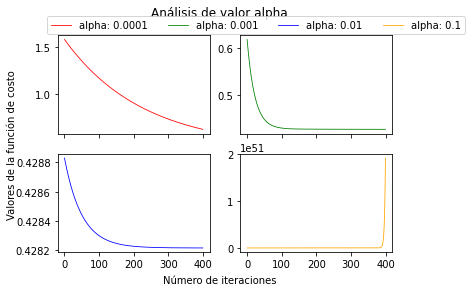

In [197]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=False)
line1, = ax1.plot(np.arange(0, 400), J_alpha.iloc[0], color='r', linewidth=0.8)
line2, = ax2.plot(np.arange(0, 400), J_alpha.iloc[1], color='g', linewidth=0.8)
line3, = ax3.plot(np.arange(0, 400), J_alpha.iloc[2], color='b', linewidth=0.8)
line4, = ax4.plot(np.arange(0, 400), J_alpha.iloc[3], color='orange', linewidth=0.8)
_ = plt.figlegend(handles=[line1, line2, line3, line4], 
                  labels=["alpha: "+str(alpha_val[0]), "alpha: "+str(alpha_val[1]), "alpha: "+str(alpha_val[2]), "alpha: "+str(alpha_val[3])], 
                  ncol = 4,
                  loc = [0.1, 0.88])
_ = fig.text(0.5, 0.03, 'Número de iteraciones', ha='center', va='center')
_ = fig.text(0.02, 0.5, 'Valores de la función de costo', ha='center', va='center', rotation='vertical')
_ = fig.suptitle("Análisis de valor alpha", fontsize=12)

plt.savefig('Analisis_valor_alpha.png')